In [9]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

In [10]:
restaurants_raw = pd.read_csv(r"data_hyderabad/105_restaurants.csv")
reviews_raw = pd.read_csv(r"data_hyderabad/10k_reviews.csv")

In [11]:
tokenizer_roberta = AutoTokenizer.from_pretrained("Dizex/InstaFoodRoBERTa-NER")
model_roberta = AutoModelForTokenClassification.from_pretrained("Dizex/InstaFoodRoBERTa-NER")

c:\Users\User\anaconda3\envs\text-mining1\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [12]:
pipe = pipeline("ner", model=model_roberta, tokenizer=tokenizer_roberta)

In [13]:
examples = ["Today I had burger for dinner and kebab for breakfast",
            "We tried the Pizza, Chicken Breast stuffed with spinach, spaghetti followed by deserts."]

examples_df = pd.DataFrame(examples, columns=["text"])
examples_df

,text
0,Today I had burger for dinner and kebab for br...
1,"We tried the Pizza, Chicken Breast stuffed wit..."


In [14]:
reviews_top50 = reviews_raw.head(50)
reviews_top50 = reviews_top50[["Review"]]
reviews_top50

,Review
0,"The ambience was good, food was quite good . h..."
1,Ambience is too good for a pleasant evening. S...
2,A must try.. great food great ambience. Thnx f...
3,Soumen das and Arun was a great guy. Only beca...
4,Food is good.we ordered Kodi drumsticks and ba...
5,"Ambiance is good, service is good, food is aPr..."
6,"Its a very nice place, ambience is different, ..."
7,Well after reading so many reviews finally vis...
8,"Excellent food , specially if you like spicy f..."
9,Came for the birthday treat of a close friend....


In [15]:
reviews_df = reviews_raw.copy()
reviews_df = reviews_df[["Review"]]
reviews_df = reviews_df.head(50)

In [16]:
ner_entity_results = pipe(list(reviews_df['Review']), aggregation_strategy="simple")

In [17]:
def convert_entities_to_list(df: pd.DataFrame, entities: list[list[dict]]) -> pd.DataFrame:
    def extract_entities(text, entity_list):
        ents = []
        for ent in entity_list:
            e = {"start": ent["start"], "end": ent["end"], "label": ent["entity_group"]}
            if ents and (-1 <= ent["start"] - ents[-1]["end"] <= 1) and (ents[-1]["label"] == e["label"]):
                ents[-1]["end"] = e["end"]
                continue
            ents.append(e)
        return [text[e["start"]:e["end"]] for e in ents]

    df['meals'] = [extract_entities(text, entity_list) for text, entity_list in zip(df['Review'], entities)]
    return df

# Apply the function to the examples DataFrame

In [18]:
convert_entities_to_list(reviews_top50, ner_entity_results)
reviews_top50

,Review,meals
0,"The ambience was good, food was quite good . h...",[]
1,Ambience is too good for a pleasant evening. S...,[]
2,A must try.. great food great ambience. Thnx f...,[Penne Alfredo Pasta]
3,Soumen das and Arun was a great guy. Only beca...,[]
4,Food is good.we ordered Kodi drumsticks and ba...,"[Kodi drumsticks, basket mutton biryani]"
5,"Ambiance is good, service is good, food is aPr...",[]
6,"Its a very nice place, ambience is different, ...",[]
7,Well after reading so many reviews finally vis...,"[corn, Tawa fish, Basket Biryani, biryani]"
8,"Excellent food , specially if you like spicy f...",[]
9,Came for the birthday treat of a close friend....,[Chili honey lotus stem]


In [78]:
import re

# find the ratings in reviews
example = """
smoked salmon Croissant 4.5/5
mushroom melt 4/5
Smoked salmon bagel 3.5/5
prawn croissant 4.5/5"""


example_ratings = reviews_raw.iloc[881]['Review']

rating_review_pattern = re.compile(r"([a-zA-Z\s]+)\s([\d\.]+\/\d)", re.IGNORECASE)
ratings = rating_review_pattern.findall(example_ratings)
print(ratings)



[('d rate food', '3/5'), ('\r\nAmbience', '4/5'), ('\r\nLocation', '4/5')]


In [19]:
# Apply the regex pattern to the "Review" column to extract ratings
reviews_raw['Extracted_Ratings'] = reviews_raw['Review'].apply(lambda x: rating_review_pattern.findall(x) if isinstance(x, str) else [])

# Display the DataFrame with the new column
reviews_raw[['Review', 'Extracted_Ratings']]
reviews_raw.sort_values(by='Extracted_Ratings', ascending=False)

NameError: name 'rating_review_pattern' is not defined

```markdown
##EDA

In [20]:
import matplotlib.pyplot as plt

reviews_ratings = reviews_raw.groupby('Rating').agg({'Review': 'count'})
reviews_ratings

,Review
Rating,
1,1735
1.5,9
2,684
2.5,19
3,1192
3.5,47
4,2373
4.5,69
5,3826


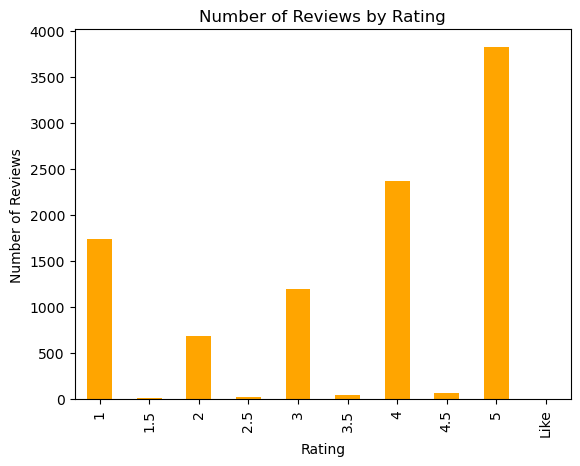

In [21]:
reviews_ratings.plot(kind='bar', legend=False, color = 'orange')
plt.title('Number of Reviews by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [22]:
non_integer_ratings = reviews_raw[reviews_raw['Rating'].apply(lambda x: '.' in str(x))]
non_integer_ratings

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
975,Cream Stone,Yashwant Darsi,It's too crowded with delivery executives all ...,3.5,"14 Reviews , 83 Followers",11/13/2018 20:09,0
1151,Barbeque Nation,The Foodie Bookworm,We are very satisfied with the food and the se...,4.5,"108 Reviews , 242 Followers",10/25/2018 7:57,0
1188,Barbeque Nation,Deepak,Quick review points\r\n- slippery floor .. be ...,2.5,"2 Reviews , 3 Followers",6/23/2018 14:54,0
2170,Jonathan's Kitchen - Holiday Inn Express & Suites,Devyani Agrawal,Amazing food. The way they serve it will make ...,4.5,"13 Reviews , 67 Followers",2/14/2019 23:23,0
2831,Behrouz Biryani,Nikita.ved,Biryani is good but they didn't deliver ...I h...,2.5,"1 Review , 2 Followers",12/21/2018 13:19,0
...,...,...,...,...,...,...,...
9987,Chinese Pavilion,Deba Das,Initially thought of going to Wonton (Gachibow...,3.5,"31 Reviews , 101 Followers",7/24/2016 16:44,3
9994,Chinese Pavilion,Shiladitya Chaudhury,Chinese Pavilion in Banjara HIlls was the firs...,1.5,"6 Reviews , 3 Followers",6/5/2016 10:49,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3


In [23]:
ratings_restaurants = reviews_raw.groupby('Restaurant').agg({'Rating': 'value_counts'}).unstack(fill_value=0)
ratings_restaurants.loc['Total'] = ratings_restaurants.sum()
ratings_restaurants

Rating                                   \
Rating                                     1 1.5    2 2.5     3 3.5     4 4.5   
Restaurant                                                                      
10 Downing Street                          7   0    5   0    14   0    49   0   
13 Dhaba                                  22   0    7   0     8   0    27   0   
3B's - Buddies, Bar & Barbecue             2   0    4   0     1   0     2   0   
AB's - Absolute Barbecues                  0   0    2   0     1   0     4   0   
Absolute Sizzlers                         20   0    7   0     9   0    19   0   
...                                      ...  ..  ...  ..   ...  ..   ...  ..   
Yum Yum Tree - The Arabian Food Court     12   0   14   0    16   0    22   0   
Zega - Sheraton Hyderabad Hotel            1   0    2   0     8   0    29   0   
Zing's Northeast Kitchen                  13   0   10   0    13   0    27   0   
eat.fit                                   27   0    7   0    15   0    21   0   
Total                                   1735   9  684  19  1193  47  2373  69   

                                                  
Rating                                    5 Like  
Restaurant                                        
10 Downing Street                        25    0  
13 Dhaba                                 36    0  
3B's - Buddies, Bar & Barbecue           91    0  
AB's - Absolute Barbecues                93    0  
Absolute Sizzlers                        45    0  
...                                     ...  ...  
Yum Yum Tree - The Arabian Food Court    36    0  
Zega - Sheraton Hyderabad Hotel          60    0  
Zing's Northeast Kitchen                 37    0  
eat.fit                                  30    0  
Total                                  3832    1  

[101 rows x 10 columns]

```markdown
## Sentiment Analysis - Transformers


In [24]:
from transformers import AutoModelForSequenceClassification,AutoTokenizer
from scipy.special import softmax

In [25]:
model = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_model = AutoModelForSequenceClassification.from_pretrained(model, max_length=561)
sentiment_tokenizer = AutoTokenizer.from_pretrained(model)
#optimus_primer = pipeline("sentiment-analysis", model=sentiment_model, tokenizer=sentiment_tokenizer)

c:\Users\User\anaconda3\envs\text-mining1\lib\site-packages\huggingface_hub\file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\User\anaconda3\envs\text-mining1\lib\site-packages\transformers\modeling_utils.py:399: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly all

In [26]:
example = "I love the new features of this app!"

In [27]:
encoded_input = sentiment_tokenizer(example, return_tensors='pt')
sent = sentiment_model(**encoded_input)
sent_scores = softmax(sent[0][0].detach().numpy())

In [28]:
sent_scores_dict = {
    'negative': sent_scores[0],
    'neutral': sent_scores[1],
    'positive': sent_scores[2]
}

In [29]:
def optimus_sentimenter(review):
    encoded_input = sentiment_tokenizer(review, return_tensors='pt')
    sent = sentiment_model(**encoded_input)
    sent_scores = softmax(sent[0][0].detach().numpy())
    sent_scores_dict = {
    'negative': sent_scores[0],
    'neutral': sent_scores[1],
    'positive': sent_scores[2]}
    return sent_scores_dict
    

In [30]:
reviews_sent = reviews_raw.copy()
reviews_sent_500 = reviews_sent.head(500)

In [32]:
negative_scores = []
neutral_scores = []
positive_scores = []

for review in reviews_sent['Review']:
    try:
        scores = optimus_sentimenter(review)
        negative_scores.append(scores['negative'])
        neutral_scores.append(scores['neutral'])
        positive_scores.append(scores['positive'])
    except RuntimeError as e:
        print(f"RuntimeError for review: {review}\nError: {e}")
        negative_scores.append(None)
        neutral_scores.append(None)
        positive_scores.append(None)

reviews_sent['negative'] = negative_scores
reviews_sent['neutral'] = neutral_scores
reviews_sent['positive'] = positive_scores


RuntimeError for review: Visited this place on 24 March,2019, as one of my friend invited us to have a lunch party there. We went there around 1 pm and it was pretty difficult to get a car parking there, but we managed one. Not to mention that the place was literally overcrowded! Such is popularity of this place! Lets find out, how the experience was.

Ambiance


Its a multistoried restaurant. And every floor was full to the brim, with several Biriyani crazy people! We got seated at the second floor. The floor was brimming with people and hardly any empty table. The seats were well laid out , comfy and spacious. Ratings - 3.5/5.

Service


The waiter took some time to take the order and quite some time to deliver the food. He paid heed to whatever requests we made and was keen to help. Overall service was fine. Ratings - 4/5.

Food


Here comes the big deal. Lets find out if all the craze that this place generates, is worth it? Actually four of us were there for the lunch and the waite

ValueError: text input must of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [104]:
reviews_sent_500

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,negative,neutral,positive
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,0.005147,0.037544,0.957309
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,0.005603,0.015751,0.978647
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,0.003482,0.008813,0.987704
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,0.006249,0.021480,0.972271
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,0.003648,0.016062,0.980289
...,...,...,...,...,...,...,...,...,...,...
495,Over The Moon Brew Company,Krishna Bhavanasi,Excellent food and service. Niranjan and Karun...,5,1 Review,4/25/2019 20:28,0,0.005418,0.020880,0.973703
496,Over The Moon Brew Company,Alka Ranjan,"The place is awesome. Ambience is great. Food,...",5,"2 Reviews , 30 Followers",4/25/2019 18:45,0,0.006796,0.009948,0.983256
497,Over The Moon Brew Company,Shubham Rajak,"Went here to catch up with a friend, very near...",3,"5 Reviews , 3 Followers",4/25/2019 17:46,0,0.003706,0.068559,0.927735
498,Over The Moon Brew Company,Anupam Acharya,Over the Moon is a brewery where you get a lot...,5,"207 Reviews , 400 Followers",4/25/2019 11:59,6,0.001894,0.025860,0.972246


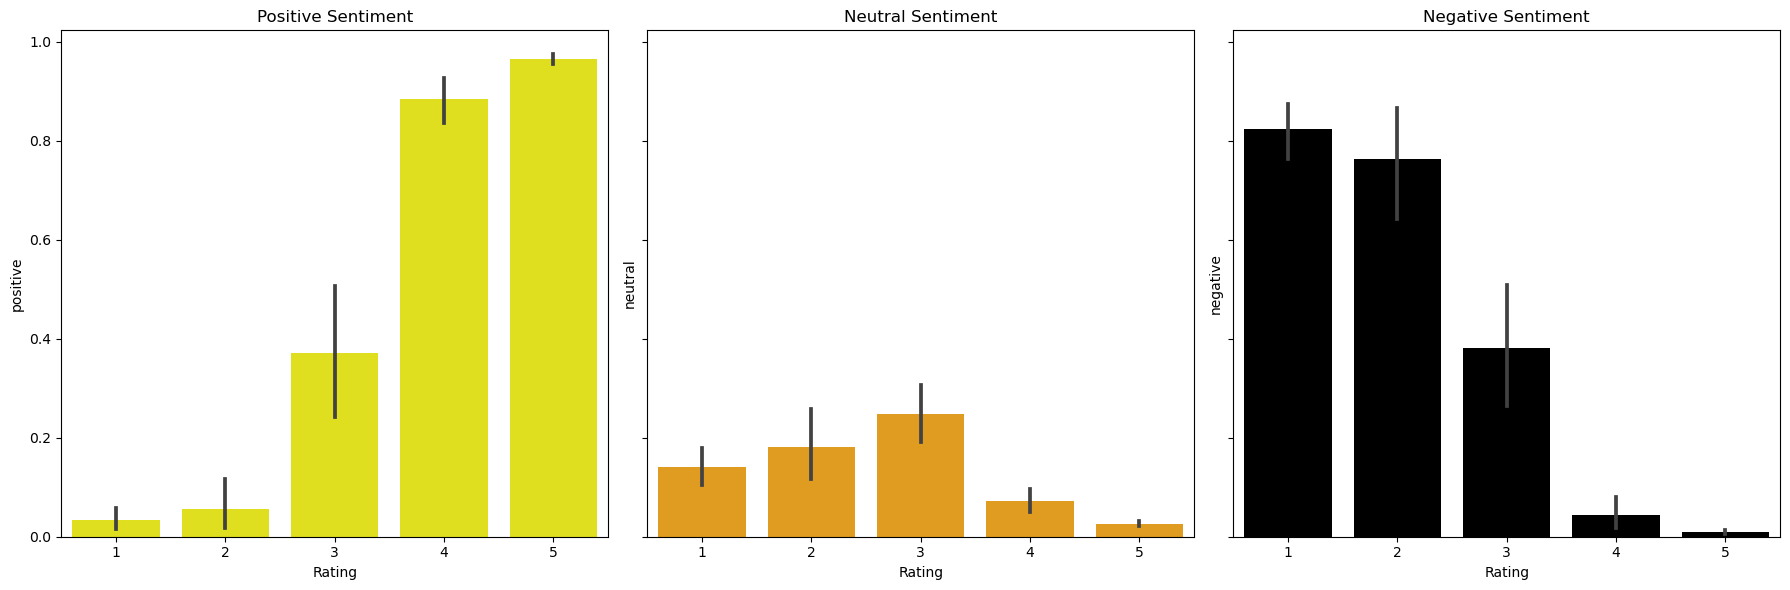

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.barplot(data=reviews_sent_500, x='Rating', y='positive', color='yellow', label='positive', order=['1', '2', '3', '4', '5'], ax=axes[0])
axes[0].set_title('Positive Sentiment')

sns.barplot(data=reviews_sent_500, x='Rating', y='neutral', color='orange', label='neutral', order=['1', '2', '3', '4', '5'], ax=axes[1])
axes[1].set_title('Neutral Sentiment')

sns.barplot(data=reviews_sent_500, x='Rating', y='negative', color='black', label='negative', order=['1', '2', '3', '4', '5'], ax=axes[2])
axes[2].set_title('Negative Sentiment')

plt.tight_layout()
plt.show()

In [128]:
#potential mistakes overly positive

reviews_sent_500_pos = reviews_sent_500[(reviews_sent_500['Rating'] <'4') & (reviews_sent_500['positive'] > 0.8)].sort_values(by='positive', ascending=False)
reviews_sent_500_pos

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,negative,neutral,positive
382,Shah Ghouse Hotel & Restaurant,Ha,Ordered chicken briyani and vegetables briyani...,3,"86 Reviews , 145 Followers",3/26/2019 2:49,0,0.003424,0.022489,0.974088
441,Over The Moon Brew Company,Abhishek Chaudhuri,This place was on my Hyderabad bucket list for...,3,"4 Reviews , 6 Followers",5/13/2019 1:35,4,0.009565,0.025274,0.965161
73,Beyond Flavours,Saswati Kar Choudhury,We happened to go to this place on last sunday...,3,"51 Reviews , 232 Followers",5/14/2019 16:26,0,0.006136,0.033688,0.960177
497,Over The Moon Brew Company,Shubham Rajak,"Went here to catch up with a friend, very near...",3,"5 Reviews , 3 Followers",4/25/2019 17:46,0,0.003706,0.068559,0.927735
449,Over The Moon Brew Company,Sabiha Ambari,I was really excited about this place as I hav...,3,"161 Reviews , 1101 Followers",5/11/2019 0:32,0,0.030815,0.052898,0.916287
223,Flechazo,Ananya G,I went to this place for lunch buffet by seein...,3,"12 Reviews , 5 Followers",5/12/2019 19:49,0,0.021611,0.147436,0.830953
336,Shah Ghouse Hotel & Restaurant,Bhumika,Shwarma was really good. Biryani was average w...,3,"65 Reviews , 12 Followers",4/30/2019 0:32,0,0.050540,0.146548,0.802912


In [127]:
#potential mistakes overly negative

reviews_sent_500_neg = reviews_sent_500[(reviews_sent_500['Rating'] >='4') & (reviews_sent_500['negative'] > 0.5)].sort_values(by='negative', ascending=False)
reviews_sent_500_neg

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,negative,neutral,positive
349,Shah Ghouse Hotel & Restaurant,Ajaz Mohammed,No onions for any biriyani full fake delivery....,4,1 Review,4/18/2019 22:08,0,0.877777,0.114087,0.008135
276,Flechazo,Epicure,"I feel veg starters shud be improvised, we had...",4,"61 Reviews , 26 Followers",4/26/2019 16:45,9,0.773404,0.186450,0.040146
370,Shah Ghouse Hotel & Restaurant,Jaswanth Chowdary,It is completely biryani house.. You will not ...,4,"14 Reviews , 19 Followers",4/1/2019 0:23,0,0.769410,0.194423,0.036167
306,Shah Ghouse Hotel & Restaurant,Mikhail Wadhwani,Used to hear that this was probably the best p...,5,"22 Reviews , 171 Followers",5/22/2019 19:07,0,0.659830,0.281917,0.058253
324,Shah Ghouse Hotel & Restaurant,Prashanth,forgot to send the spoon.,5,4 Reviews,5/12/2019 18:01,0,0.541067,0.431058,0.027875
